In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\krunal sheth\Downloads\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


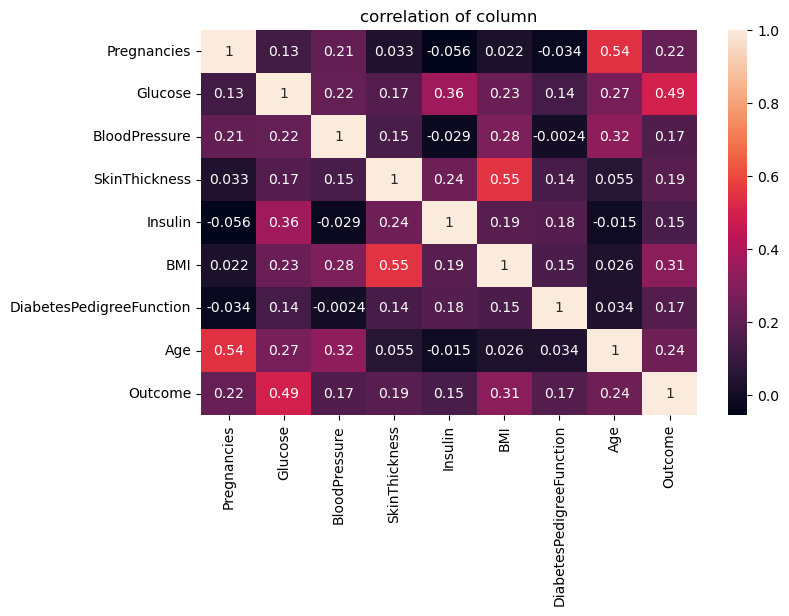

In [9]:
plt.figure(figsize= (8,5))
sns.heatmap(df.corr(), annot = True)
plt.title('correlation of column')
plt.show()

In [10]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

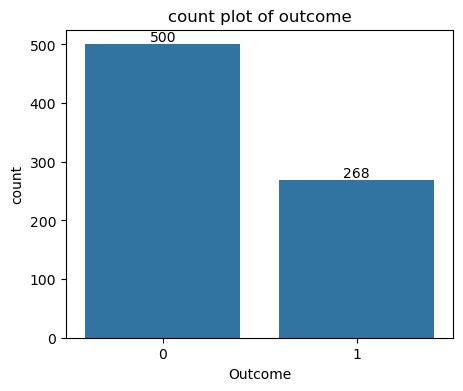

In [11]:
plt.figure(figsize = (5,4))
ax = sns.countplot(data = df, x = 'Outcome')
ax.bar_label(ax.containers[0])
ax.set_title("count plot of outcome")
plt.show()

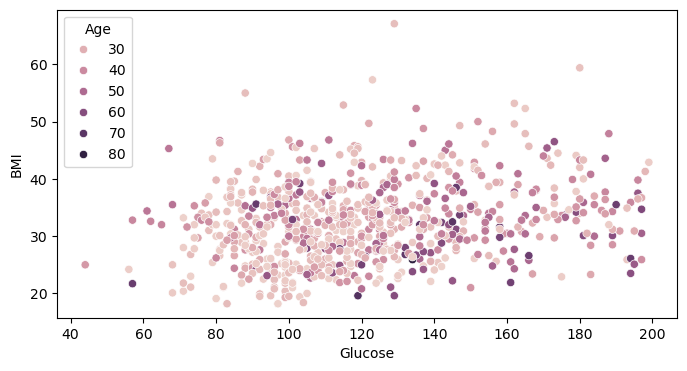

In [12]:
plt.figure(figsize = (8,4))
sns.scatterplot(data = df, x = 'Glucose', y = 'BMI', hue = 'Age')
plt.show()

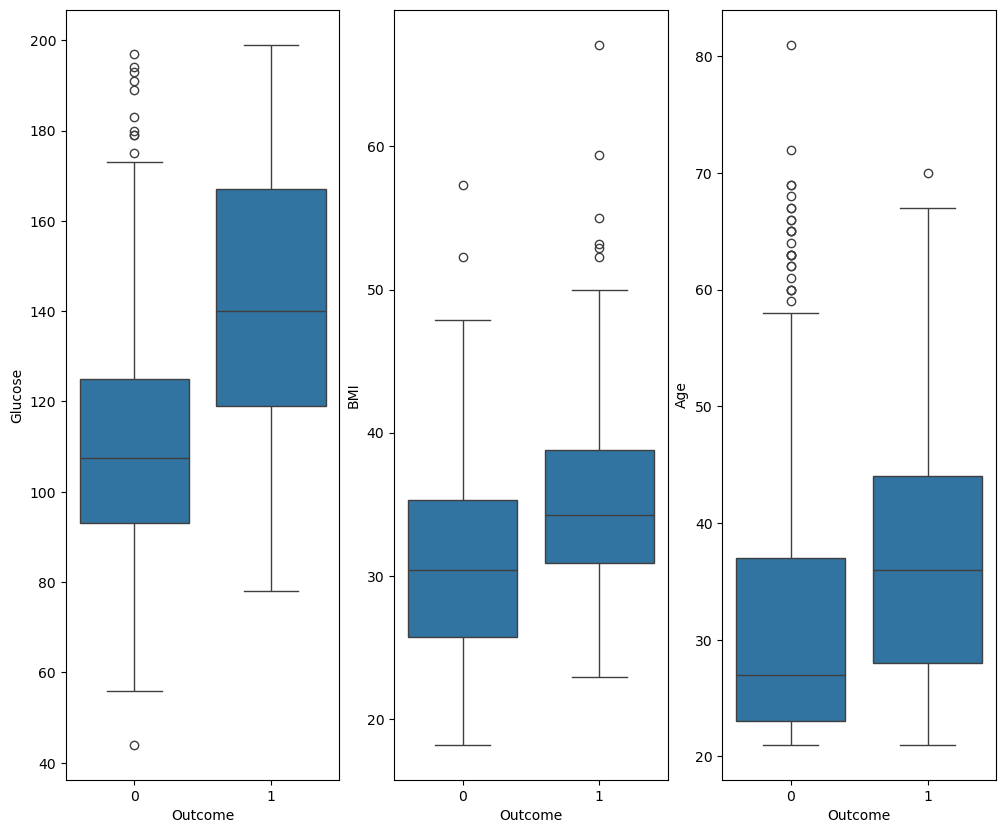

In [13]:
plt.figure(figsize = (12,10))
plt.subplot(1,3,1)
sns.boxplot(data = df, x = 'Outcome', y = 'Glucose')
plt.subplot(1,3,2)
sns.boxplot(data = df, x = 'Outcome', y = 'BMI')
plt.subplot(1,3,3)
sns.boxplot(data = df, x = 'Outcome', y = 'Age')
plt.show()

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
def detect_outliers(data,cols):
    for x in cols:
        q75,q25 = np.percentile(data.loc[:,x],[75,25])
        inter_qr = q75 - q25

        max = q75 + (1.5 * inter_qr)
        min = q75 - (1.5 * inter_qr)

        data.loc[data[x] < min,x] = np.nan
        data.loc[data[x] > max,x] = np.nan
        

In [16]:
outliers_drop = detect_outliers(df,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [17]:
df.isnull().sum()

Pregnancies                   4
Glucose                      36
BloodPressure                63
SkinThickness               124
Insulin                      49
BMI                          58
DiabetesPedigreeFunction     29
Age                           9
Outcome                       0
dtype: int64

In [18]:
df = df.dropna(axis = 0)

In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
y = df[['Outcome']]
y.head(3)

,Outcome
0,1
1,0
2,1


In [21]:
x = df.iloc[:,:-1]
x.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32.0


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.57553212, -0.20001306, -0.65450189, ...,  0.98739263,
         1.13125766,  0.60935714],
       [ 1.48961255,  1.51810132,  0.41966829, ..., -0.09833959,
        -1.09945268,  0.97073903],
       [ 0.8802256 ,  0.38487694,  1.0641704 , ...,  1.19753436,
         1.01182412,  0.24797526],
       ...,
       [-1.25262873, -1.15045932,  0.63450233, ..., -0.16838683,
         0.64581811, -0.65547946],
       [-0.33854831,  1.84710195,  0.41966829, ...,  0.07677851,
         2.06746252, -0.29409757],
       [ 0.57553212,  0.42143257, -0.43966786, ...,  0.35696747,
         0.41850911, -0.47478851]])

In [25]:
df1 = pd.DataFrame(x_train, columns = x.columns)
df1.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.575532,-0.200013,-0.654502,2.012394,-0.645348,0.987393,1.131258,0.609357
1,1.489613,1.518101,0.419668,-0.779803,-0.645348,-0.098340,-1.099453,0.970739
2,0.880226,0.384877,1.064170,-0.779803,-0.645348,1.197534,1.011824,0.247975


In [26]:
x_test = scaler.transform(x_test)
x_test

array([[-1.25262873,  0.01932069, -0.22483382, ...,  0.51457376,
        -0.67565624,  1.60315733],
       [ 0.8802256 , -0.63868056, -0.22483382, ..., -0.23843408,
        -0.49457958, -0.92651587],
       [ 0.27083865, -0.49245806, -1.29900401, ...,  0.42701471,
         0.31063365, -0.8361704 ],
       ...,
       [-0.64324178, -0.52901369, -1.08416997, ..., -0.4485758 ,
        -1.06092573, -1.19755228],
       [-0.94793526,  1.0428782 , -1.51383804, ..., -1.27163087,
        -0.98001914, -1.10720681],
       [-0.03385483,  0.67732194, -0.00999978, ..., -1.00895372,
        -0.72959397,  0.51901167]])

In [27]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

In [28]:
regression.fit(x_train,y_train)

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# save model

In [29]:
pickle.dump(regression,open('Diabetes_logistic_model.pickel','wb'))

In [30]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 10B0-EB93

 Directory of C:\Users\krunal sheth\Rushali\Machine Learning\Logistic Regression

05/30/2025  04:44 PM    <DIR>          .
05/30/2025  04:44 PM    <DIR>          ..
05/28/2025  01:44 PM    <DIR>          .ipynb_checkpoints
05/30/2025  04:44 PM           413,938 diabetes.ipynb
05/30/2025  04:45 PM               778 Diabetes_logistic_model.pickel
               2 File(s)        414,716 bytes
               3 Dir(s)  49,453,293,568 bytes free


# prediction

In [31]:
pre = scaler.transform([[6,148,72,35,0,33.6,0.627,50]])
pre

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.57553212,  0.93321132, -0.22483382,  1.08166197, -1.13196409,
         0.04175489,  0.74598817,  1.42246639]])

In [32]:
regression.predict([[0.57553212,  0.93321132, -0.22483382,  1.08166197, -1.13196409,
         0.04175489,  0.74598817,  1.42246639]])

array([1], dtype=int64)

In [33]:
scaler.transform([[1,85,66,29,0,26.6,0.351,31]])

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.94793526, -1.36979307, -0.86933593,  0.15092958, -1.13196409,
        -1.18407182, -0.31735562, -0.29409757]])

In [34]:
regression.predict([[-0.94793526, -1.36979307, -0.86933593,  0.15092958, -1.13196409,
        -1.18407182, -0.31735562, -0.29409757]])

array([0], dtype=int64)

In [35]:
regression.score(x_train,y_train)

0.7417417417417418

In [36]:
regression.score(x_test,y_test)

0.7272727272727273

# confusion matrix

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

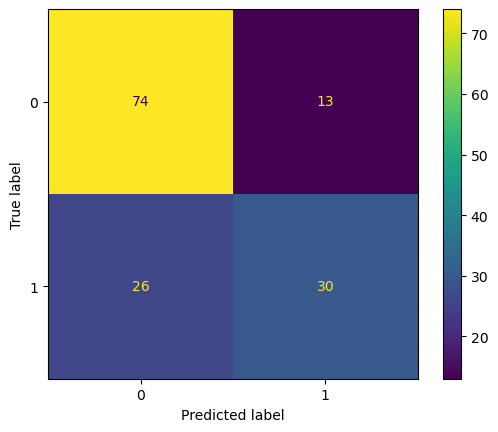

In [38]:
ConfusionMatrixDisplay.from_estimator(regression, x_test, y_test)

In [39]:
y_pred = regression.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        87
           1       0.70      0.54      0.61        56

    accuracy                           0.73       143
   macro avg       0.72      0.69      0.70       143
weighted avg       0.72      0.73      0.72       143



In [41]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

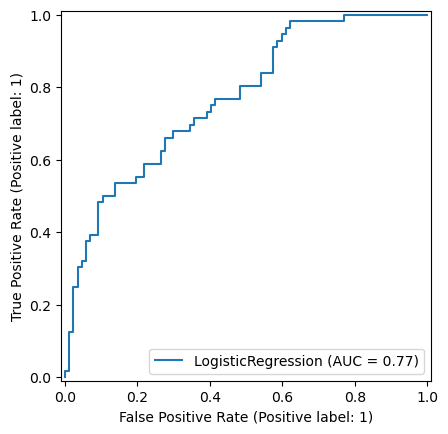

In [42]:
RocCurveDisplay.from_estimator(regression,x_test,y_test)